In [0]:
from fastai import *
from fastai.vision import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [2]:
%pwd

'/content'

In [0]:
!mkdir black teddies grizzly

In [0]:
# !rm data/bears/teddies/*.aspx

# Create folders


In [0]:
folder = 'black'
file = 'blackbear.txt'

In [0]:
folder = 'grizzly'
file = 'grizzly.txt'

In [0]:
folder = 'teddies'
file = 'teddy.txt'

In [0]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents = True, exist_ok = True)

# Download images

In [0]:
classes  = ['grizzly', 'teddies','black']

In [0]:
download_images(path/folder/file, dest, max_pics = 200)

## Remove images that dont open

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

# View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train = ".", valid_pct = 0.2, ds_tfms = get_transforms(), size = 224, num_workers = 4).normalize(imagenet_stats)

In [41]:
data.classes

['black', 'grizzly', 'teddies']

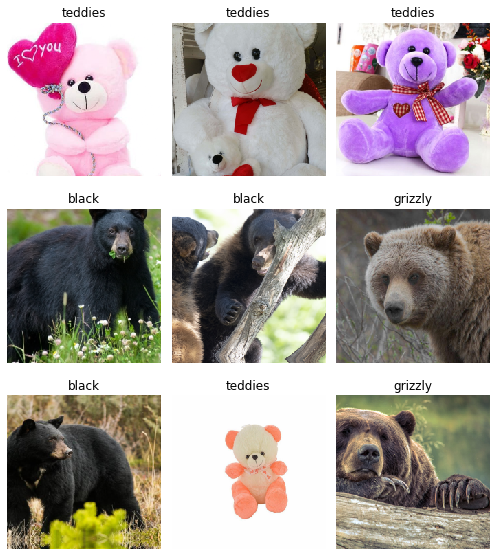

In [67]:
data.show_batch(rows = 3, figsize = (7,8))

In [43]:
data.classes, data.c , len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddies'], 3, 432, 107)

# Training model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [50]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.252989,0.206262,0.056075,02:11
1,0.700506,0.346124,0.056075,02:11
2,0.499397,0.273574,0.037383,02:12
3,0.410482,0.227071,0.037383,02:11


In [0]:
learn.save('stage-1')

In [0]:
 learn.unfreeze()

In [56]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


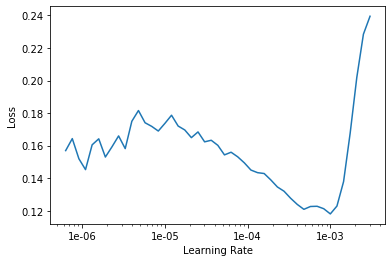

In [57]:
learn.recorder.plot()

## Choose rates
- Max downward slope

In [62]:
learn.fit_one_cycle(2, max_lr = slice(3e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.100589,0.255502,0.037383,02:49
1,0.058254,0.257670,0.028037,02:49


In [0]:
learn.save('stage-2')

# Perf

In [0]:
learn.load('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

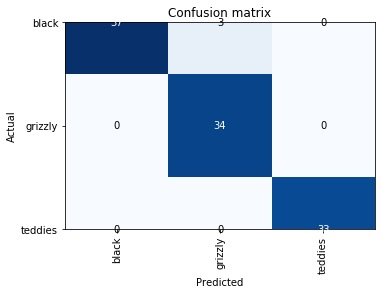

In [66]:
interp.plot_confusion_matrix()

# Predict for a single image
- Inference

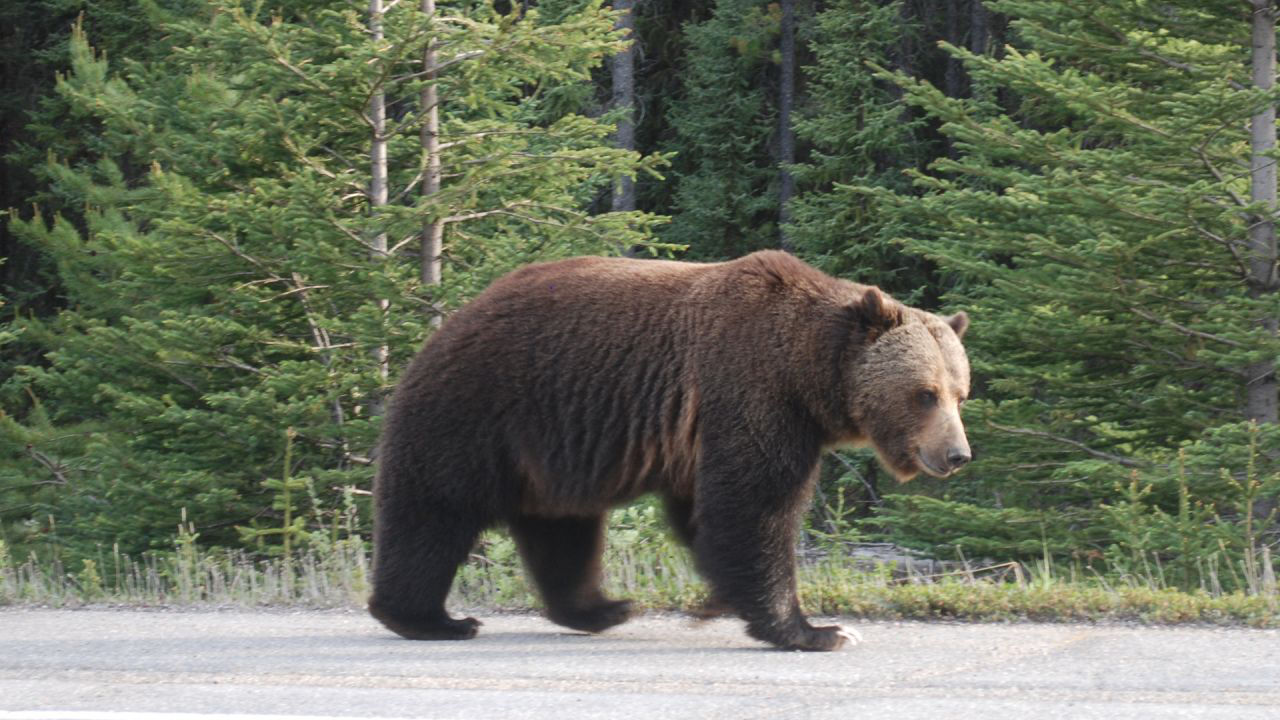

In [80]:
img = open_image(path/'grizzly'/'00000020.jpg');img

In [0]:
classes = ['black','grizzly','teddies']

In [85]:
data2 = ImageDataBunch.single_from_classes(path, classes, ds_tfms = get_transforms(), size = 224).normalize(imagenet_stats)
learn = cnn_learner(data2, models.resnet34)
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/bears;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): Ba

In [86]:
pred_class, pred_idx, outputs = learn.predict(img); pred_class

Category grizzly